In [1]:
import os
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

/Users/tanwimallick/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
df_DDCRNN = pd.read_csv('Results/Results_DDCRNN_30_24_full/MAPE_DCRNN.csv')
df_ARIMA = pd.read_csv('Results/Results_ARIMA/MAPE_ARIMA.csv')
df_LR = pd.read_csv('Results/Results_LinearRegression/MAPE_LinearRegression.csv')
df_RM = pd.read_csv('Results/Results_RandomForest/MAPE_RandomForest.csv')
df_GB = pd.read_csv('Results/Results_GradientBoosting/MAPE_GradientBoosting.csv')
df_RNNNR = pd.read_csv('Results/Results_SimpleRNN_NR/MAPE_SimpleRNN.csv')
#df_RNNR = pd.read_csv('R2_all/r2_94/R2_SimpleRNN_R.csv')
df_LSTMNR = pd.read_csv('Results/Results_vanillaLSTM_NR/MAPE_vanillaLSTM.csv')
#df_LSTMR = pd.read_csv('R2_all/r2_94/R2_vanillaLSTM_R.csv')
df_SLSTMNR = pd.read_csv('Results/Results_stackedLSTM_NR/MAPE_stackedLSTM.csv')
#df_SLSTMR = pd.read_csv('R2_all/r2_94/R2_stackedLSTM_R.csv')
df_GRUNR = pd.read_csv('Results/Results_GRU_NR/MAPE_GRU.csv')
#df_GRUR = pd.read_csv('R2_all/r2_94/R2_GRU_R.csv')
df_FIRETS = pd.read_csv('Results/fireTS/MAPE_fireTS.csv')

df_DDCRNN = df_DDCRNN.set_index('sites')
df_ARIMA = df_ARIMA.set_index('sites')
df_LR = df_LR.set_index('sites')
df_RM = df_RM.set_index('sites')
df_GB = df_GB.set_index('sites')
df_RNNNR = df_RNNNR.set_index('sites')
#df_RNNR = df_RNNR.set_index('sites')
df_LSTMNR = df_LSTMNR.set_index('sites')
#df_LSTMR = df_LSTMR.set_index('sites')
df_SLSTMNR = df_SLSTMNR.set_index('sites')
#df_SLSTMR = df_SLSTMR.set_index('sites')
df_GRUNR = df_GRUNR.set_index('sites')
#df_GRUR = df_GRUR.set_index('sites')
df_FIRETS = df_FIRETS.set_index('sites')

In [19]:
df_new = pd.DataFrame({'sn':np.arange(2304)})


arr = df_DDCRNN.iloc[:,1:25].values.flatten()
#arr[arr > 100] = np.nan
df_new['DDCRNN'] = arr

ar = df_ARIMA.iloc[:,1:25].values.flatten()
arr = [numeric_string[1:-1] for numeric_string in ar if isinstance(numeric_string, int) == False]
arr = np.append(arr, np.repeat(0, 2304-len(arr)))
arr = arr.astype(np.float)
#arr[arr > 100] = np.nan
df_new['ARIMA'] = arr
 

arr = df_LR.iloc[:,1:25].values.flatten()
#arr[arr > 100] = np.nan
df_new['LR'] = arr


arr = df_RM.iloc[:,1:25].values.flatten()
#arr[arr > 100] = np.nan
df_new['RM'] = arr

arr = df_GB.iloc[:,1:25].values.flatten()
#arr[arr > 100] = np.nan
df_new['GB'] = arr

arr = df_RNNNR.iloc[:,1:25].values.flatten()
#arr[arr > 100] = np.nan
df_new['RNN'] = arr
#df_new['RNNR'] = df_RNNR.values.flatten()

arr = df_LSTMNR.iloc[:,1:25].values.flatten()
#arr[arr > 100] = np.nan
df_new['LSTM'] = arr
#df_new['LSTMR'] = df_LSTMR.values.flatten()

arr = df_SLSTMNR.iloc[:,1:25].values.flatten()
#arr[arr > 100] = np.nan
df_new['S-LSTM'] = arr
#df_new['SLSTMR'] = df_SLSTMR.values.flatten()

arr = df_GRUNR.iloc[:,1:25].values.flatten()
#arr[arr > 100] = np.nan
df_new['GRU'] = arr
#df_new['GRUR'] = df_GRUR.values.flatten()

arr = df_FIRETS.iloc[:,1:25].values.flatten()
#arr[arr > 100] = np.nan
df_new['FIRETS'] = arr

del df_new['sn']

"\ntop = 40 #m1[ind+1]+1\nfor tick in range(len(mL1)):\n    if tick == 0:\n        top = 20\n    else:\n        top = 40\n    testPlot.text(tick, top, mL1[tick],  horizontalalignment='center',  color='w', weight='semibold')\n"

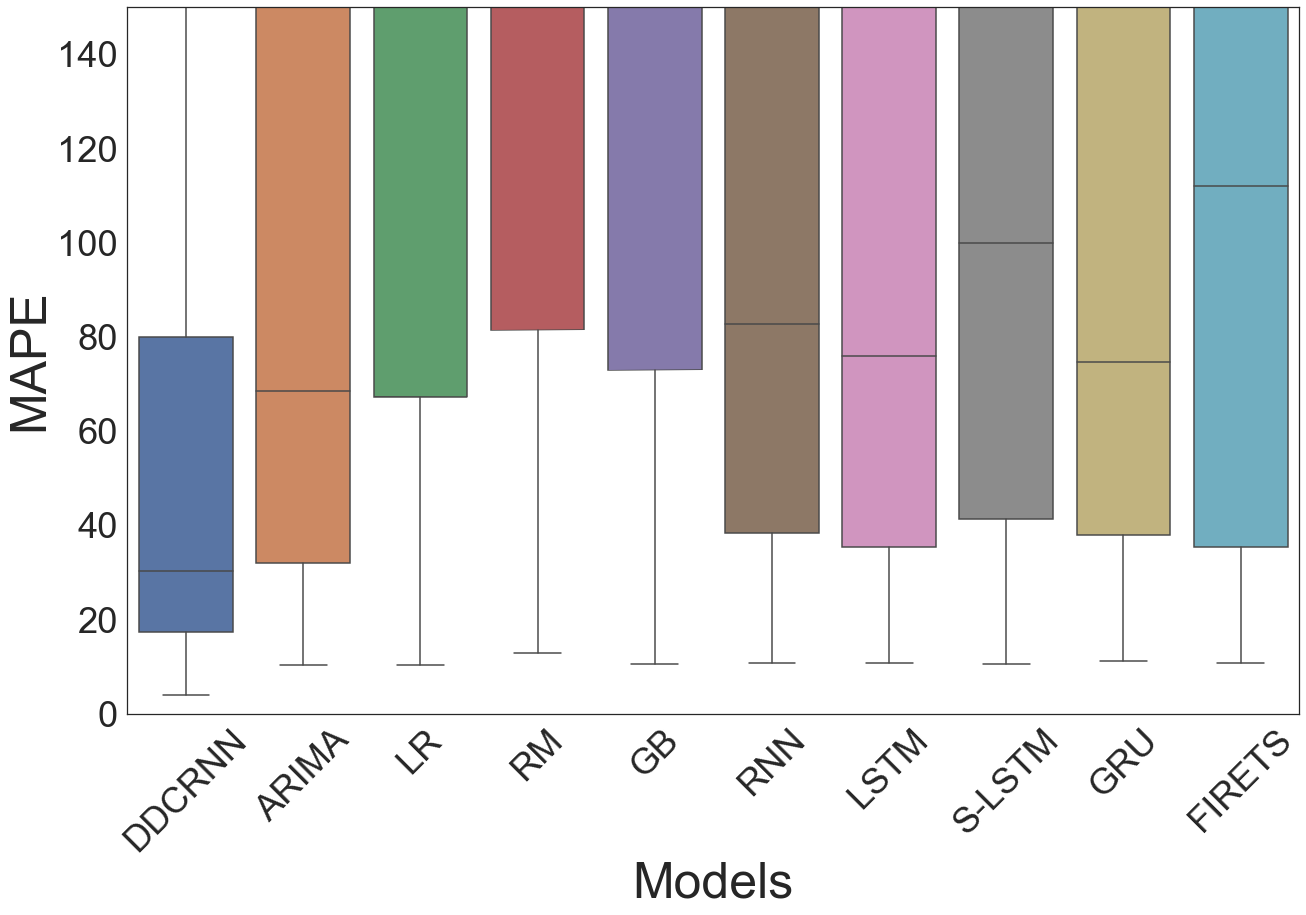

In [22]:
import seaborn as sns
import matplotlib.pylab as plt


sns.set(rc={'figure.figsize':(21,13)})
sns.set(font_scale = 3.3, style="white")
testPlot = sns.boxplot(data=df_new)
testPlot.set(ylim=(0, 150))
testPlot.set_xticklabels(testPlot.get_xticklabels(), rotation=45)

testPlot.set_xlabel('Models', fontsize=50 )  
testPlot.set_ylabel('MAPE', fontsize=50)  

mL1 = []
mL1.append(np.round(df_new['DDCRNN'].median(), decimals=2))
mL1.append(np.round(df_new['ARIMA'].median(), decimals=2))
mL1.append(np.round(df_new['LR'].median(), decimals=2))
mL1.append(np.round(df_new['RM'].median(), decimals=2))
mL1.append(np.round(df_new['GB'].median(), decimals=2))
mL1.append(np.round(df_new['RNN'].median(), decimals=2))

mL1.append(np.round(df_new['LSTM'].median(), decimals=2))
mL1.append(np.round(df_new['S-LSTM'].median(), decimals=2))
mL1.append(np.round(df_new['GRU'].median(), decimals=2))
mL1.append(np.round(df_new['FIRETS'].median(), decimals=2))

'''
top = 40 #m1[ind+1]+1
for tick in range(len(mL1)):
    if tick == 0:
        top = 20
    else:
        top = 40
    testPlot.text(tick, top, mL1[tick],  horizontalalignment='center',  color='w', weight='semibold')
'''


#plt.savefig('/Users/tanwimallick/Desktop/esnet_plots/model_comp_MAPE.png')

In [57]:
df_DDCRNN = pd.read_csv('Results/Results_DDCRNN_30_24_full/R2_DCRNN.csv')
df_ARIMA = pd.read_csv('Results/Results_ARIMA/R2_ARIMA.csv')
df_LR = pd.read_csv('Results/Results_LinearRegression/R2_LinearRegression.csv')
df_RM = pd.read_csv('Results/Results_RandomForest/R2_RandomForest.csv')
df_GB = pd.read_csv('Results/Results_GradientBoosting/R2_GradientBoosting.csv')
df_RNNNR = pd.read_csv('Results/Results_SimpleRNN_NR/R2_SimpleRNN.csv')
#df_RNNR = pd.read_csv('R2_all/r2_94/R2_SimpleRNN_R.csv')
df_LSTMNR = pd.read_csv('Results/Results_vanillaLSTM_NR/R2_vanillaLSTM.csv')
#df_LSTMR = pd.read_csv('R2_all/r2_94/R2_vanillaLSTM_R.csv')
df_SLSTMNR = pd.read_csv('Results/Results_stackedLSTM_NR/R2_stackedLSTM.csv')
#df_SLSTMR = pd.read_csv('R2_all/r2_94/R2_stackedLSTM_R.csv')
df_GRUNR = pd.read_csv('Results/Results_GRU_NR/R2_GRU.csv')
#df_GRUR = pd.read_csv('R2_all/r2_94/R2_GRU_R.csv')
df_FIRETS = pd.read_csv('Results/fireTS/R2_fireTS.csv')

df_DDCRNN = df_DDCRNN.set_index('sites')
df_ARIMA = df_ARIMA.set_index('sites')
df_LR = df_LR.set_index('sites')
df_RM = df_RM.set_index('sites')
df_GB = df_GB.set_index('sites')
df_RNNNR = df_RNNNR.set_index('sites')
#df_RNNR = df_RNNR.set_index('sites')
df_LSTMNR = df_LSTMNR.set_index('sites')
#df_LSTMR = df_LSTMR.set_index('sites')
df_SLSTMNR = df_SLSTMNR.set_index('sites')
#df_SLSTMR = df_SLSTMR.set_index('sites')
df_GRUNR = df_GRUNR.set_index('sites')
#df_GRUR = df_GRUR.set_index('sites')
df_FIRETS = df_FIRETS.set_index('sites')

In [64]:
df_new = pd.DataFrame()
df_new['DDCRNN'] = df_DDCRNN.iloc[:,1:25].values.flatten()


df_new['ARIMA'] = df_ARIMA.iloc[:,1:25].values.flatten()

df_new['LR'] = df_LR.iloc[:,1:25].values.flatten()
df_new['RM'] = df_RM.iloc[:,1:25].values.flatten()
df_new['GB'] = df_GB.iloc[:,1:25].values.flatten()
df_new['RNN'] = df_RNNNR.values.flatten()
#df_new['RNNR'] = df_RNNR.values.flatten()
df_new['LSTM'] = df_LSTMNR.values.flatten()
#df_new['LSTMR'] = df_LSTMR.values.flatten()
df_new['S-LSTM'] = df_SLSTMNR.values.flatten()
#df_new['SLSTMR'] = df_SLSTMR.values.flatten()
df_new['GRU'] = df_GRUNR.iloc[:,1:25].values.flatten()
#df_new['GRUR'] = df_GRUR.values.flatten()
df_new['FIRETS'] = df_FIRETS.iloc[:,1:25].values.flatten()

Text(0, 0.5, 'R$^2$')

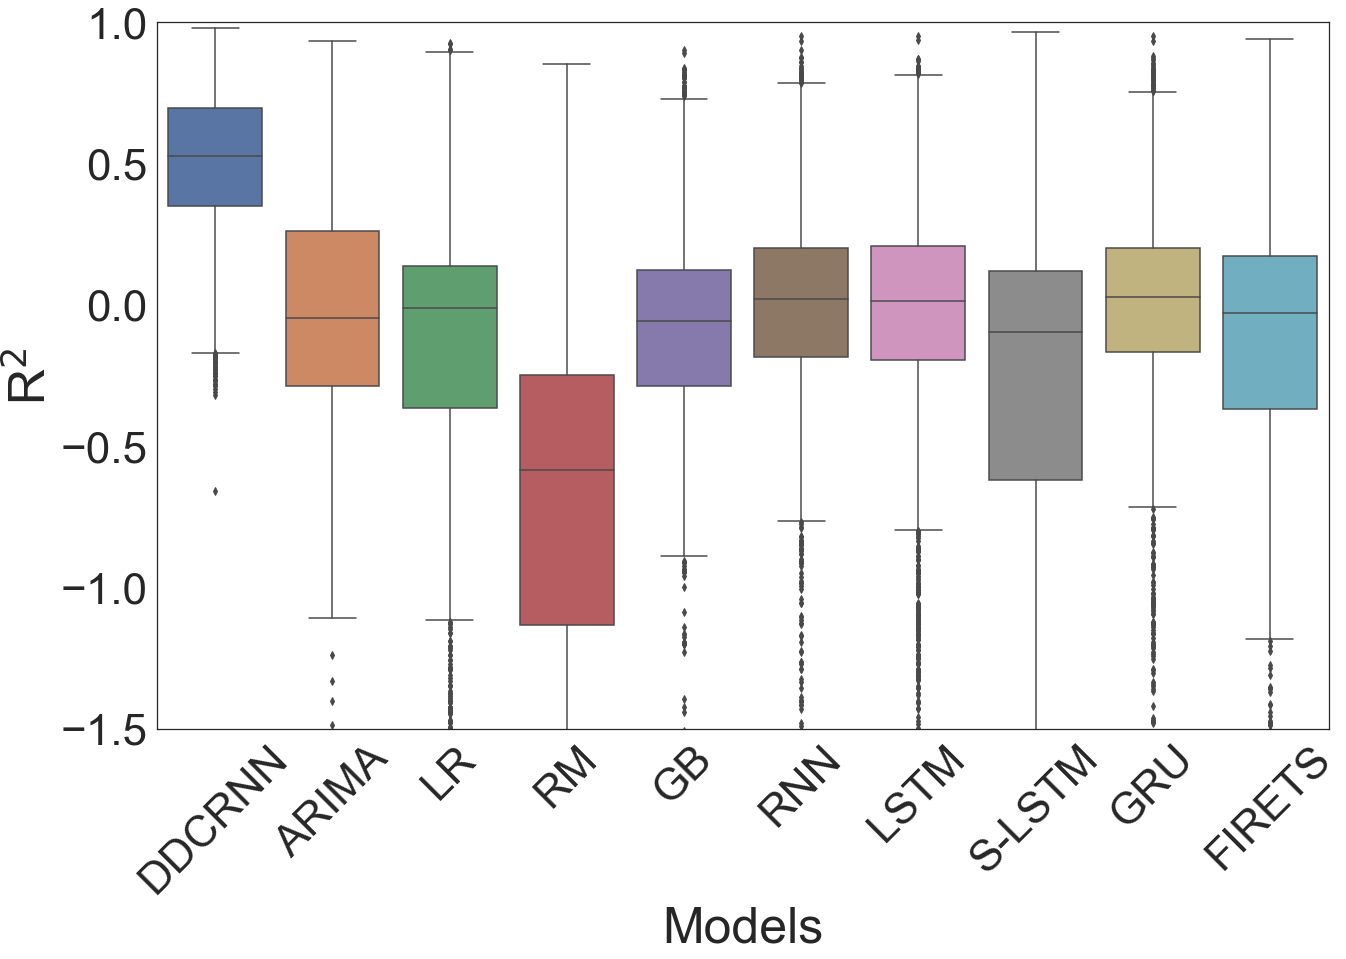

In [65]:
import seaborn as sns
import matplotlib.pylab as plt


sns.set(rc={'figure.figsize':(21,13)})
sns.set(font_scale = 4, style="white")
testPlot = sns.boxplot(data=df_new)
testPlot.set(ylim=(-1.5, 1))
testPlot.set_xticklabels(testPlot.get_xticklabels(), rotation=45)

testPlot.set_xlabel('Models', fontsize=50 )  
testPlot.set_ylabel('R$^2$', fontsize=50)  

#plt.savefig('/Users/tanwimallick/Desktop/esnet_plots/model_comp.png')

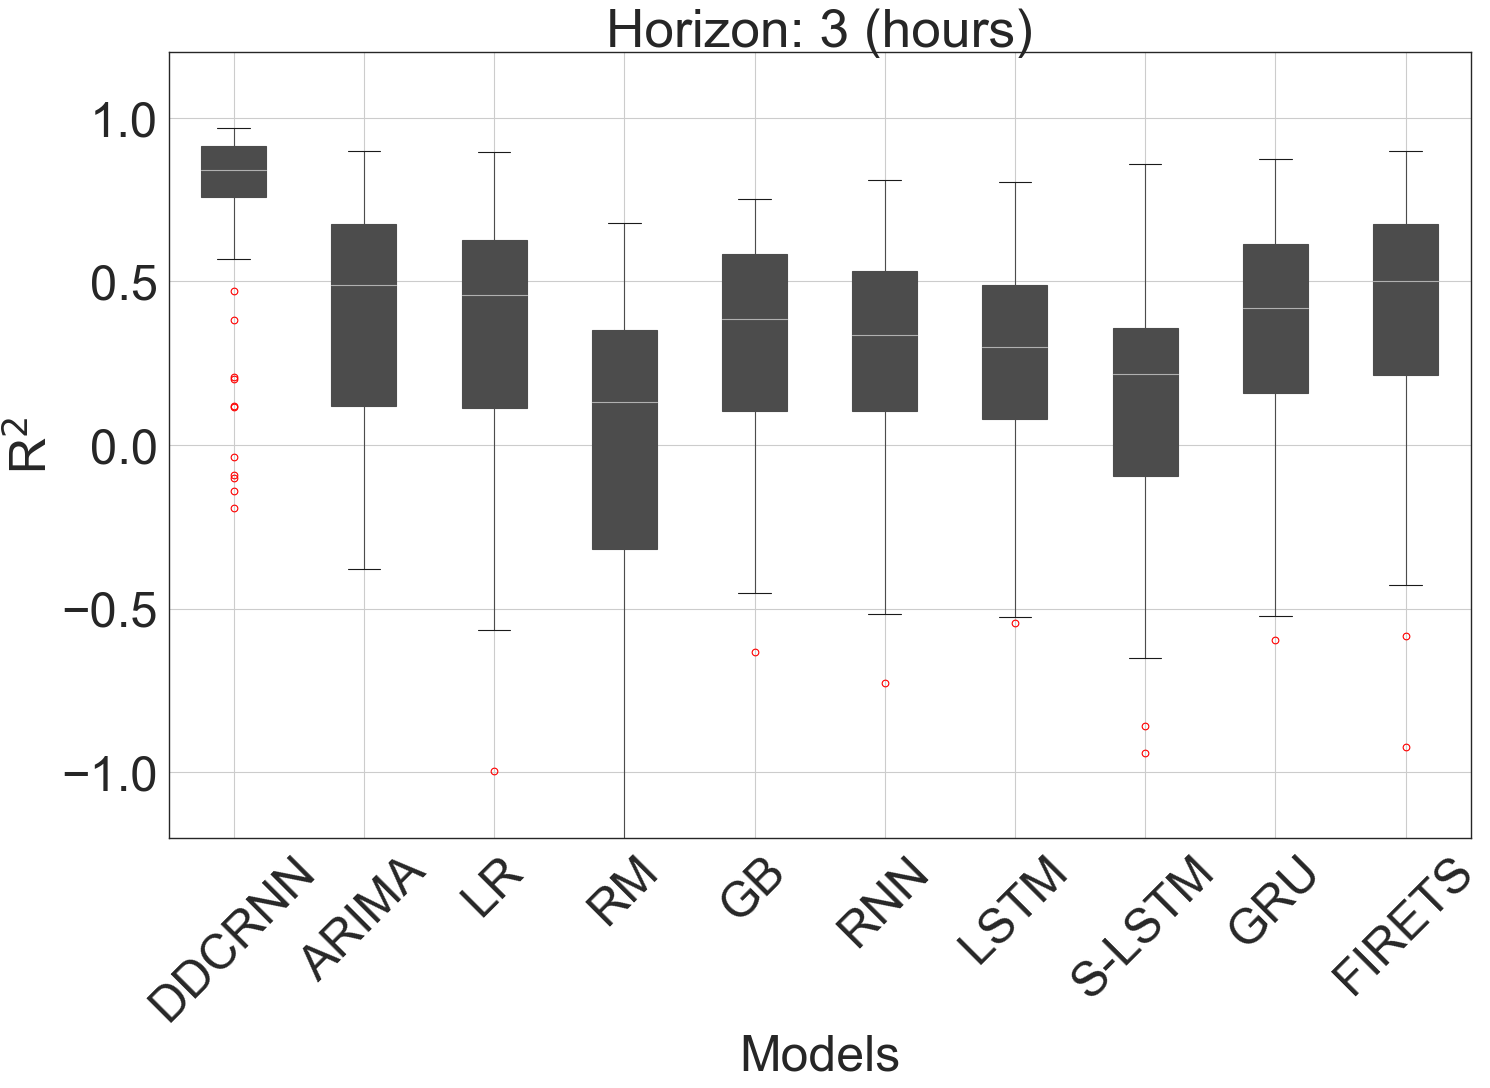

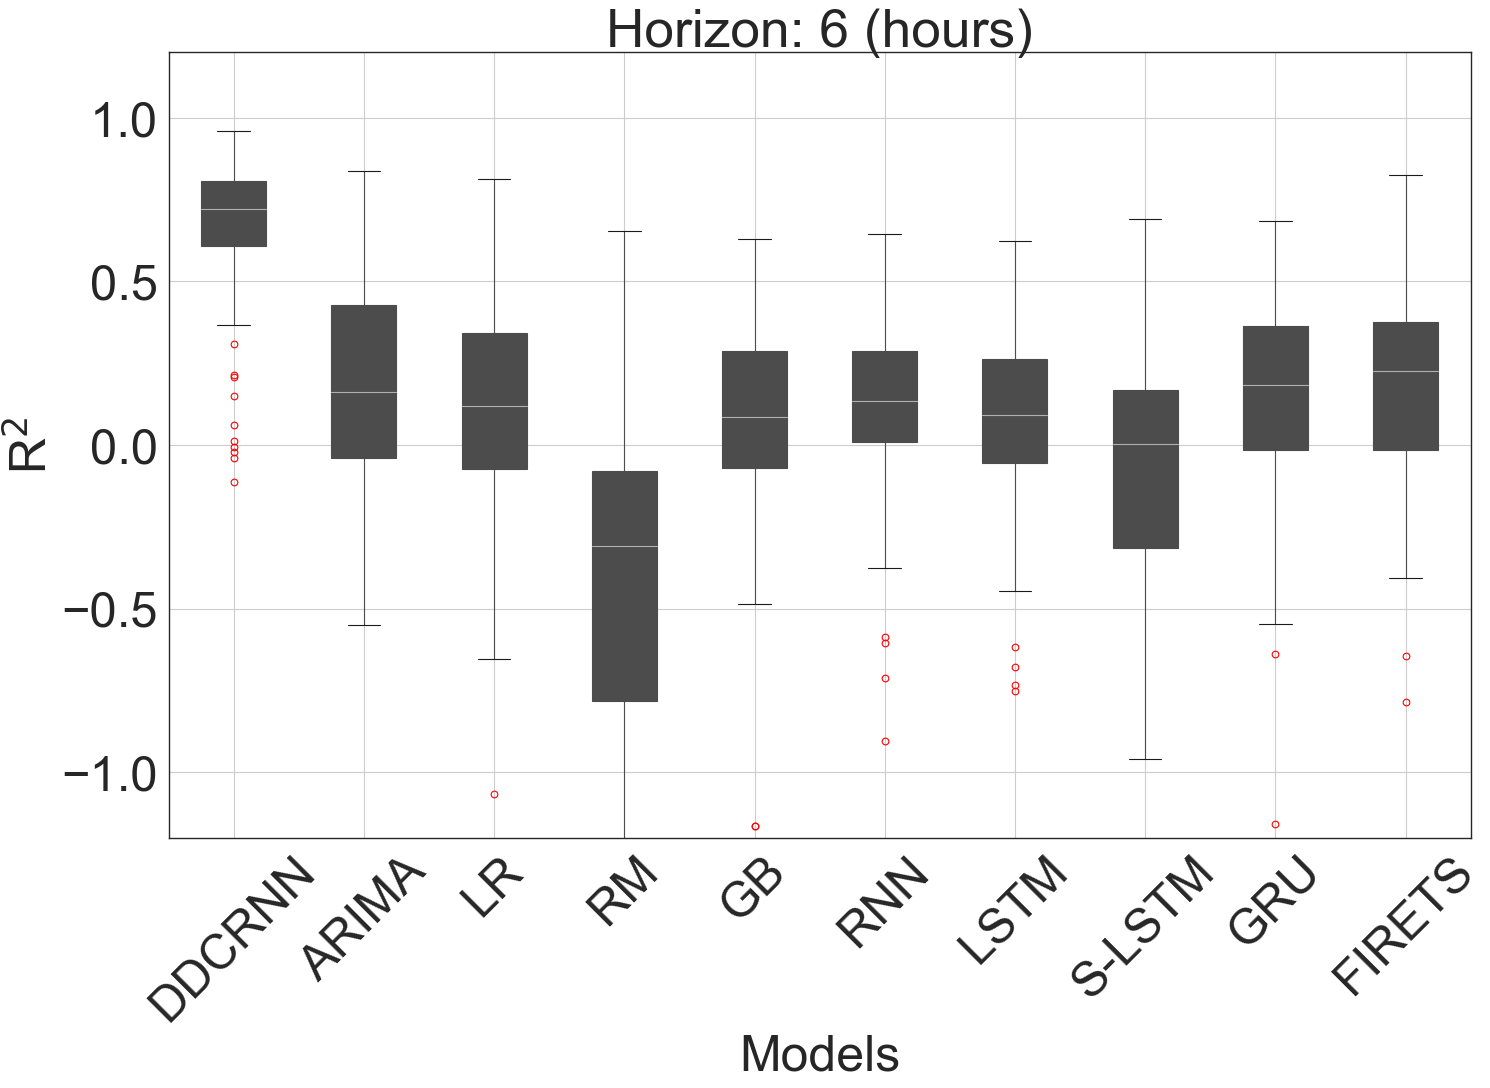

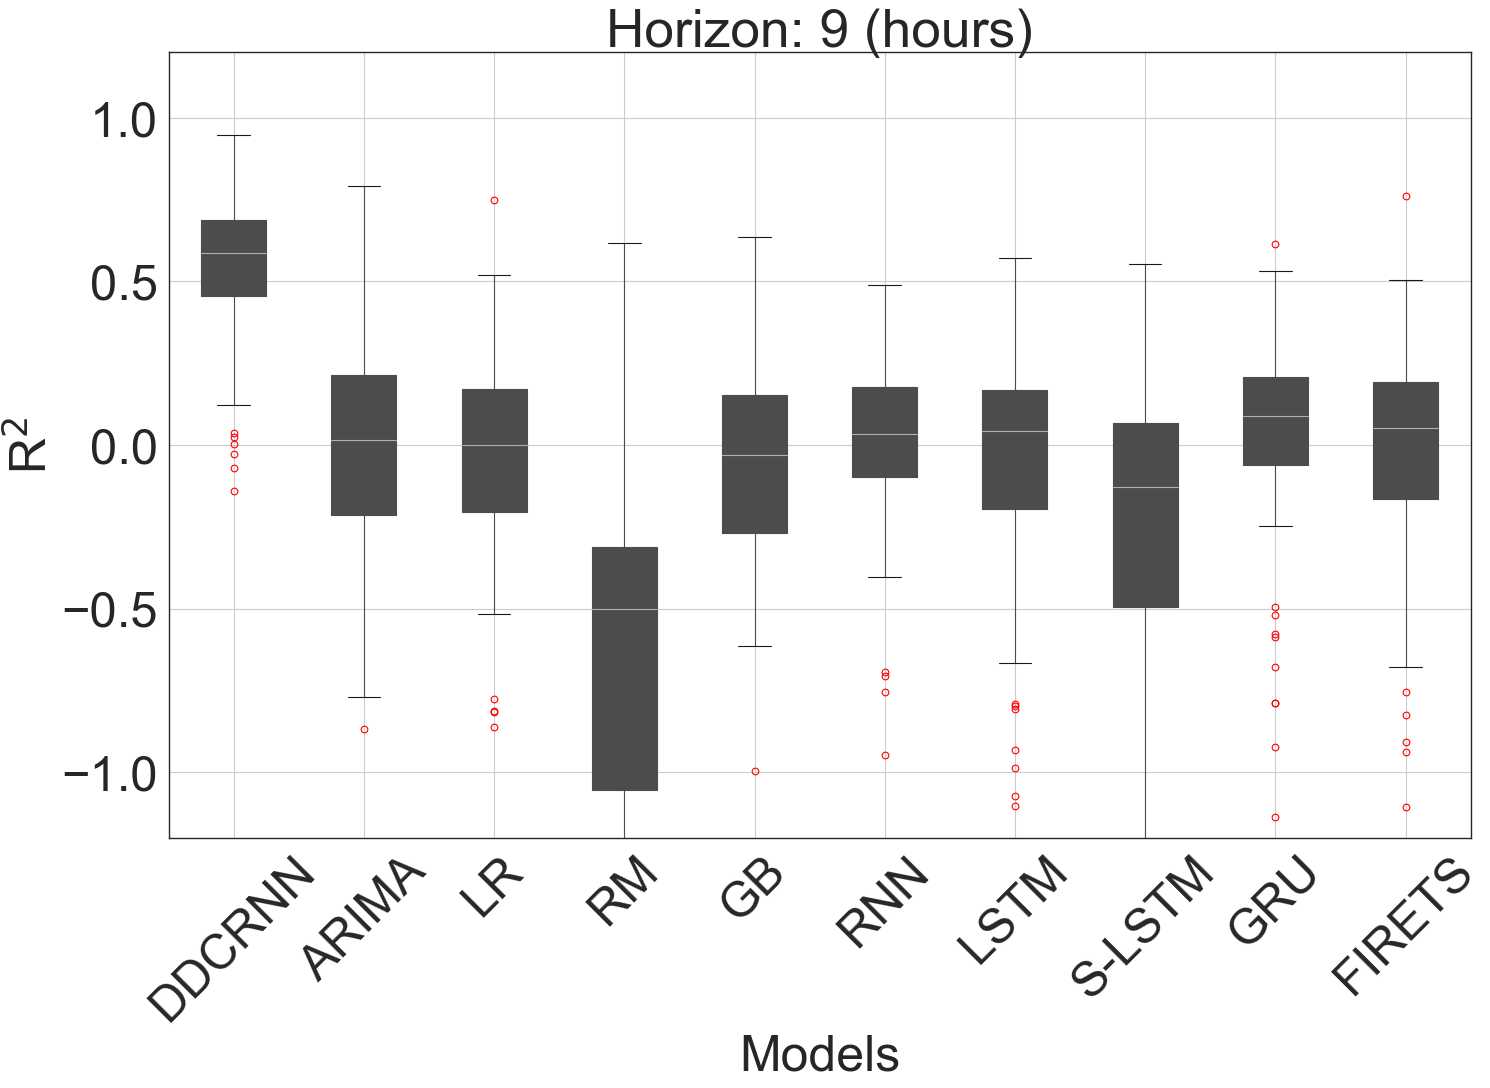

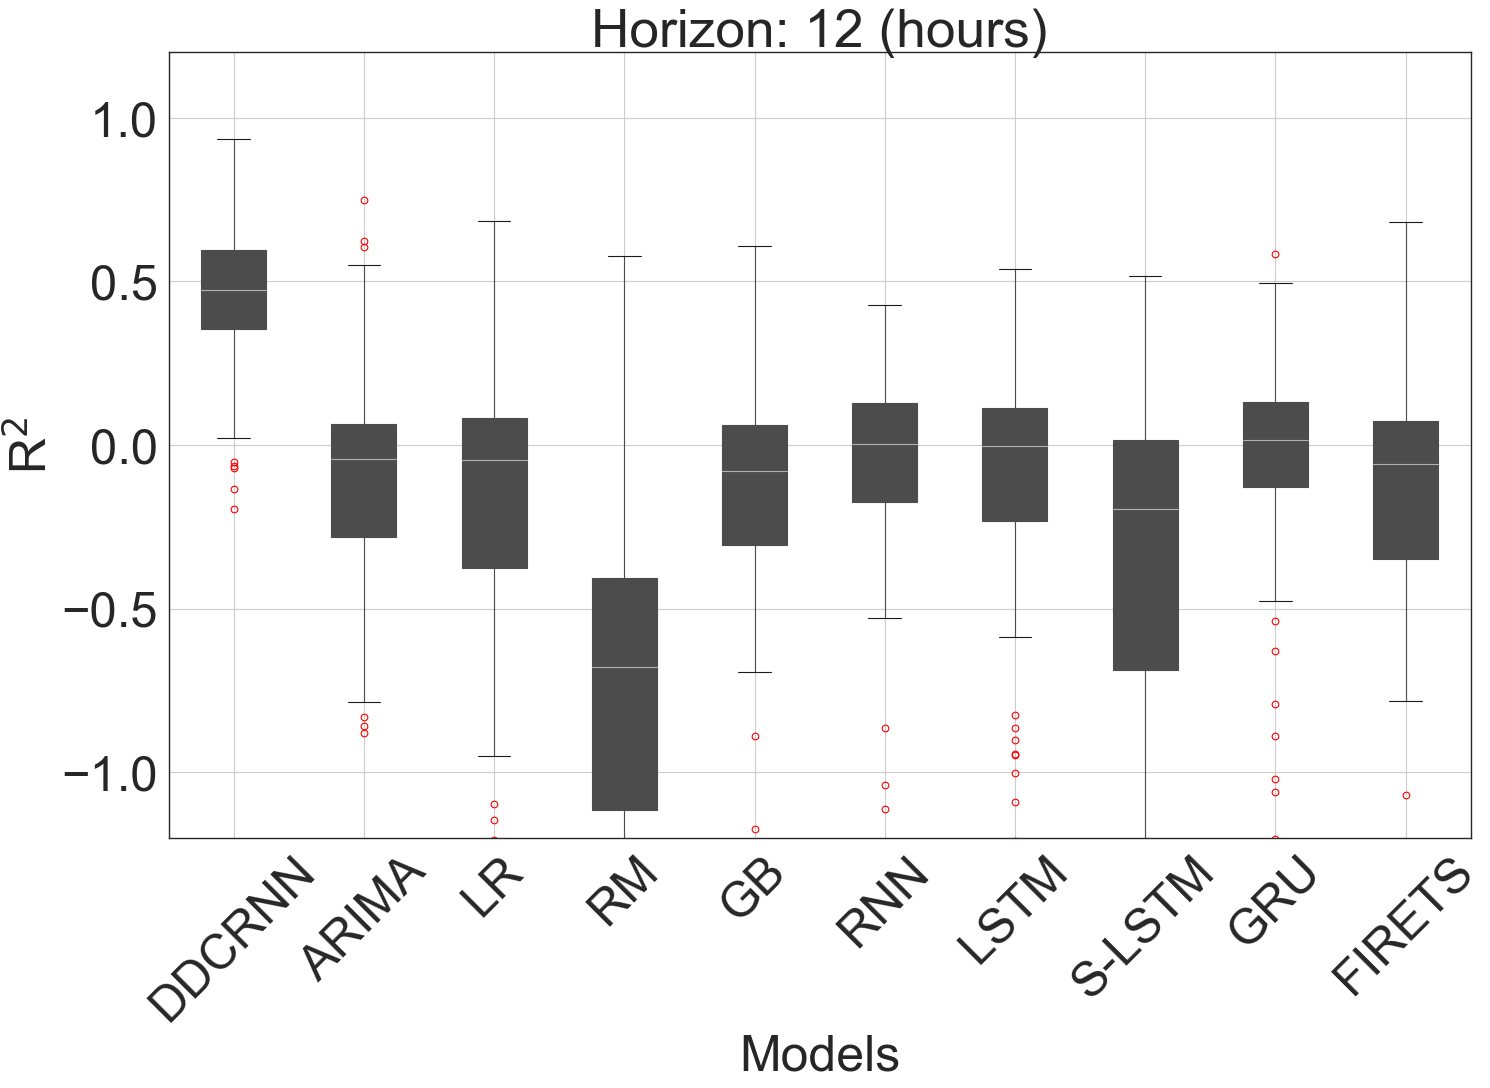

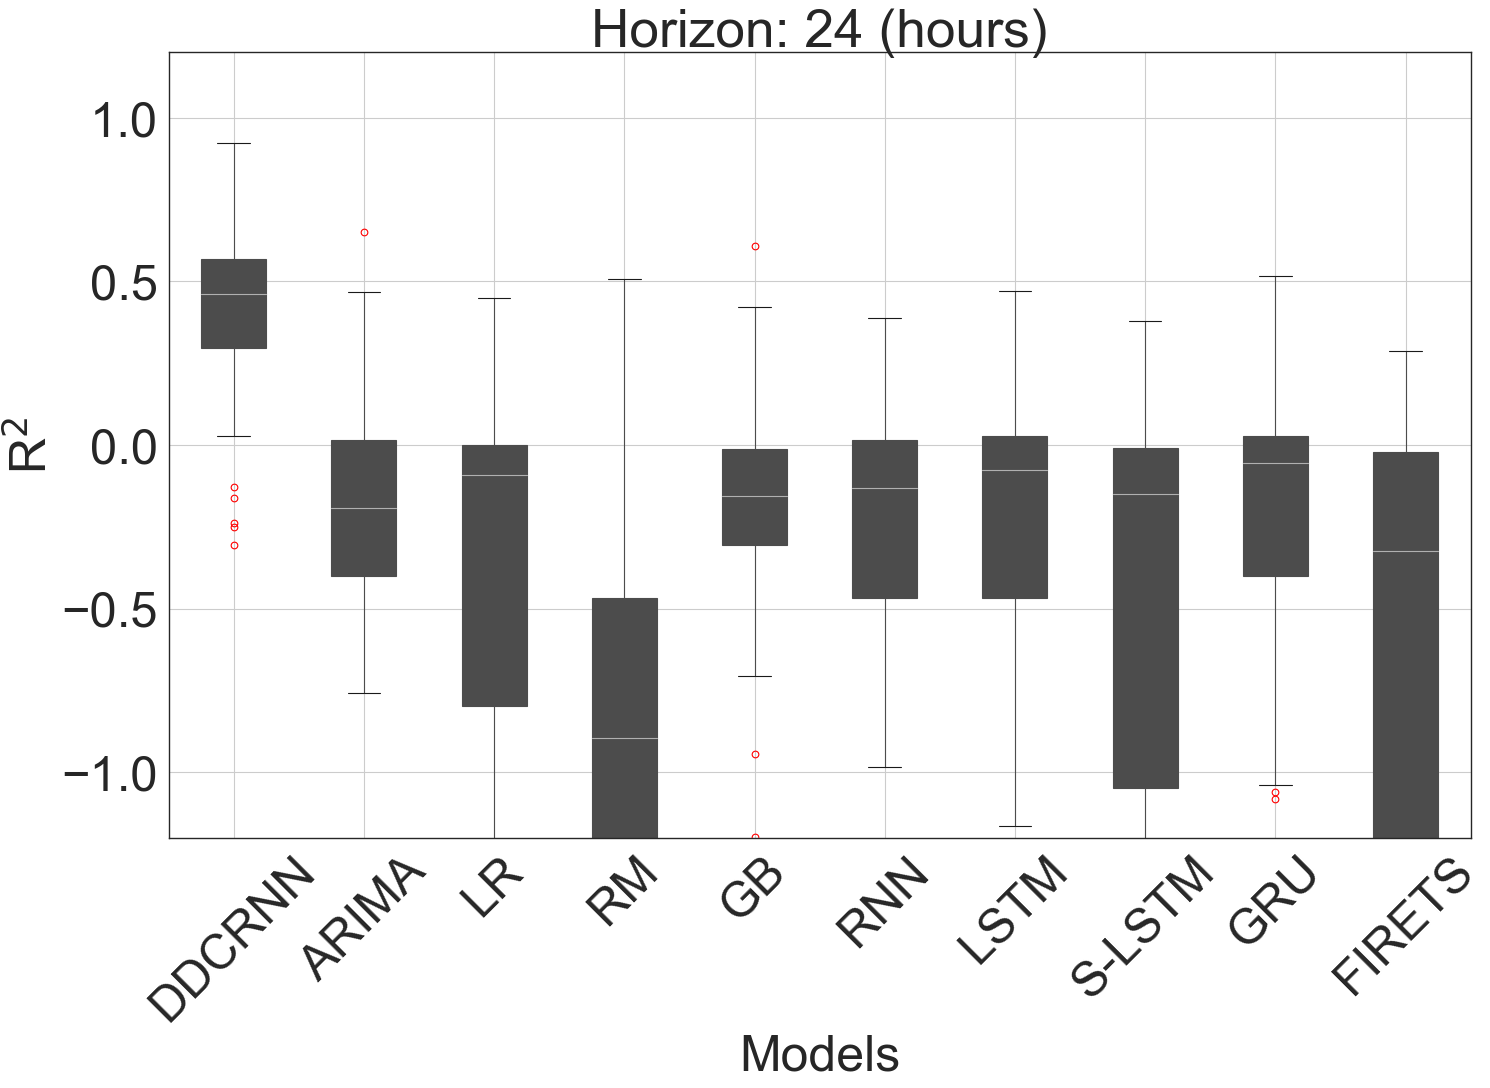

In [78]:
df_DDCRNN = pd.read_csv('Results/Results_DDCRNN_30_24_full/R2_DCRNN.csv')
df_ARIMA = pd.read_csv('Results/Results_ARIMA/R2_ARIMA.csv')
df_LR = pd.read_csv('Results/Results_LinearRegression/R2_LinearRegression.csv')
df_RM = pd.read_csv('Results/Results_RandomForest/R2_RandomForest.csv')
df_GB = pd.read_csv('Results/Results_GradientBoosting/R2_GradientBoosting.csv')
df_RNNNR = pd.read_csv('Results/Results_SimpleRNN_NR/R2_SimpleRNN.csv')
#df_RNNR = pd.read_csv('R2_all/r2_94/R2_SimpleRNN_R.csv')
df_LSTMNR = pd.read_csv('Results/Results_vanillaLSTM_NR/R2_vanillaLSTM.csv')
#df_LSTMR = pd.read_csv('R2_all/r2_94/R2_vanillaLSTM_R.csv')
df_SLSTMNR = pd.read_csv('Results/Results_stackedLSTM_NR/R2_stackedLSTM.csv')
#df_SLSTMR = pd.read_csv('R2_all/r2_94/R2_stackedLSTM_R.csv')
df_GRUNR = pd.read_csv('Results/Results_GRU_NR/R2_GRU.csv')
#df_GRUR = pd.read_csv('R2_all/r2_94/R2_GRU_R.csv')
df_FIRETS = pd.read_csv('Results/fireTS/R2_fireTS.csv')


for horizon in [3, 6, 9, 12, 24]:
    df_hor = pd.DataFrame()
    
    df_hor['DDCRNN'] = df_DDCRNN.iloc[:, horizon]
    df_hor['ARIMA'] = df_ARIMA.iloc[:, horizon]
    df_hor['LR'] = df_LR.iloc[:, horizon]
    df_hor['RM'] = df_RM.iloc[:, horizon]
    df_hor['GB'] = df_GB.iloc[:, horizon]
    df_hor['RNN'] = df_RNNNR.iloc[:, horizon]
    #df_hor['RNNR'] = df_RNNR.iloc[:, horizon]
    df_hor['LSTM'] = df_LSTMNR.iloc[:, horizon]
    #df_hor['LSTMR'] = df_LSTMR.iloc[:, horizon]
    df_hor['S-LSTM'] = df_SLSTMNR.iloc[:, horizon]
    #df_hor['SLSTMR'] = df_SLSTMR.iloc[:, horizon]
    df_hor['GRU'] = df_GRUNR.iloc[:, horizon]
    #df_hor['GRUR'] = df_GRUR.iloc[:, horizon]
    df_hor['FIRETS'] = df_FIRETS.iloc[:, horizon]
    
    plt.figure(figsize=(21, 13), dpi= 80, facecolor='w', edgecolor='k')
    c = 'red'
    bp2 = df_hor.boxplot(notch=False, patch_artist=True,
            boxprops=dict(facecolor='blue', color='blue'),
            capprops=dict(color='blue'),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))
        
    plt.ylim(-1.2, 1.2)
    plt.xticks(rotation=45)
    plt.ylabel('R$^2$', fontsize=45)     
    plt.xlabel('Models', fontsize=45) 
    plt.title('Horizon: %d (hours)'%(horizon) )

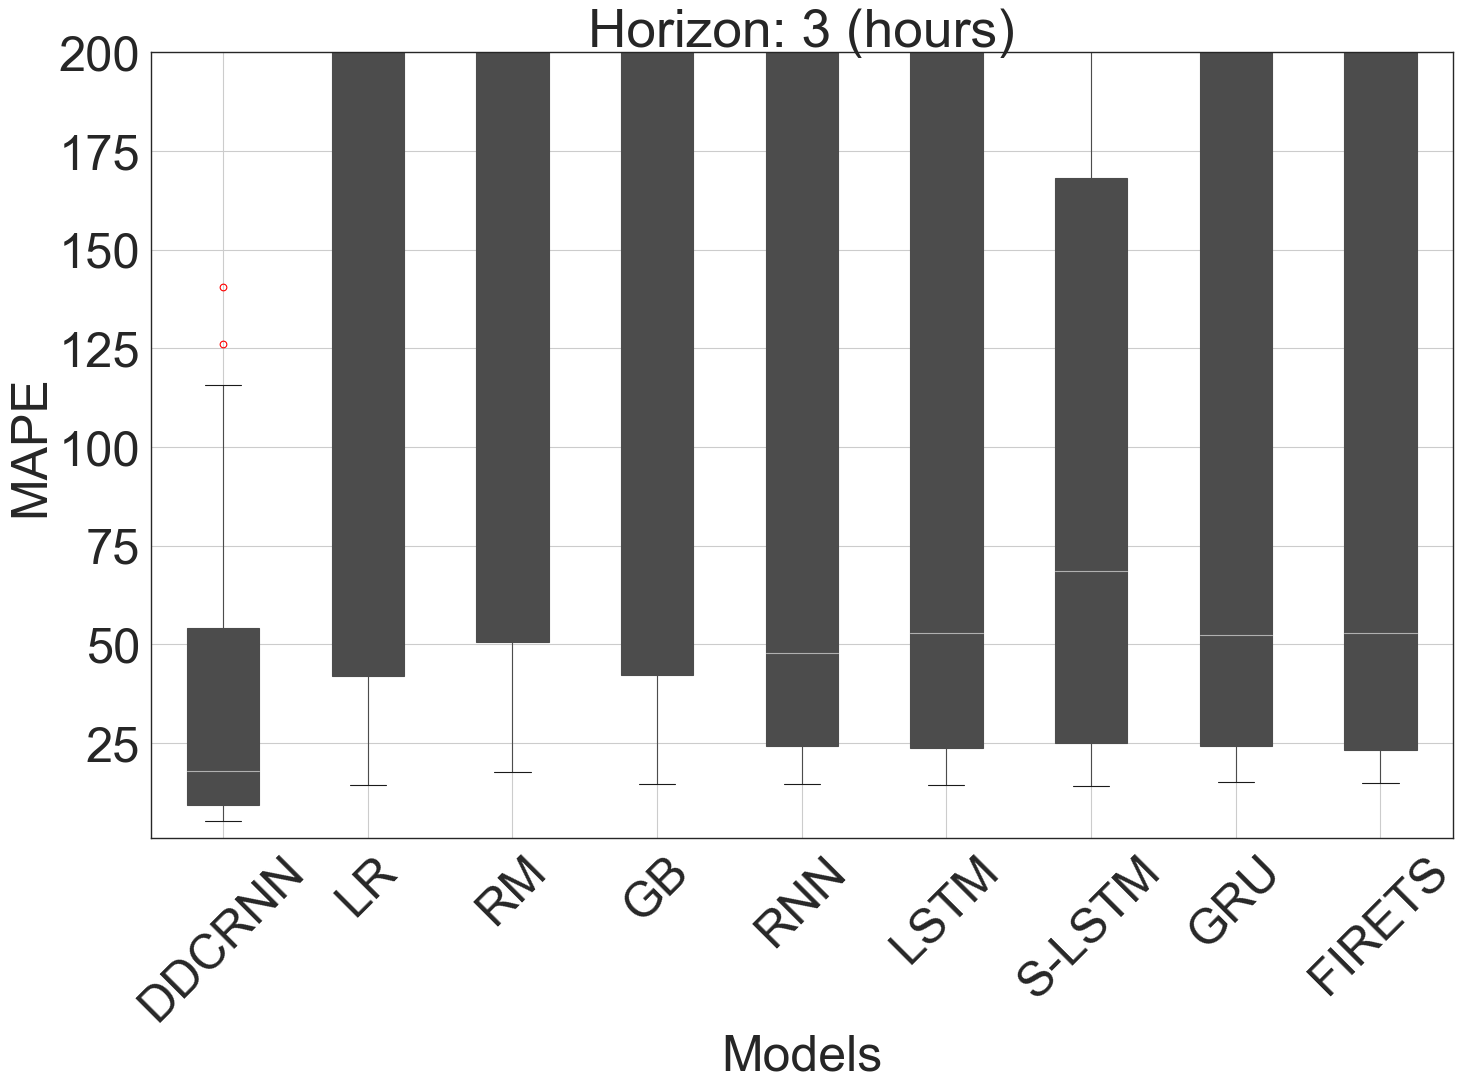

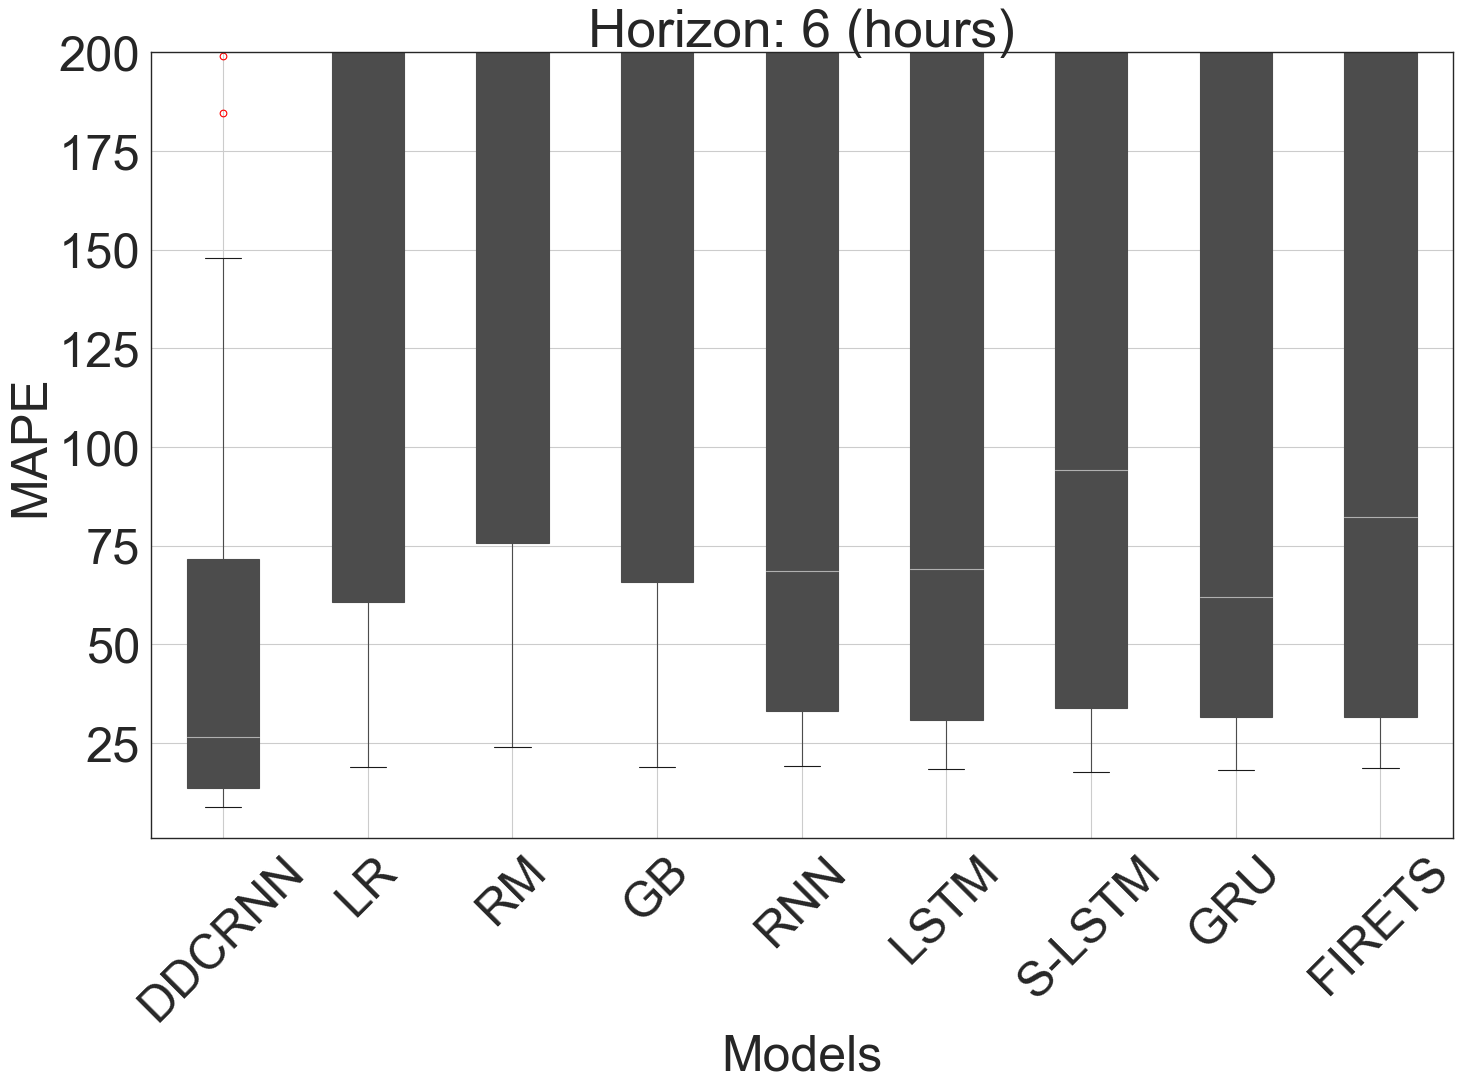

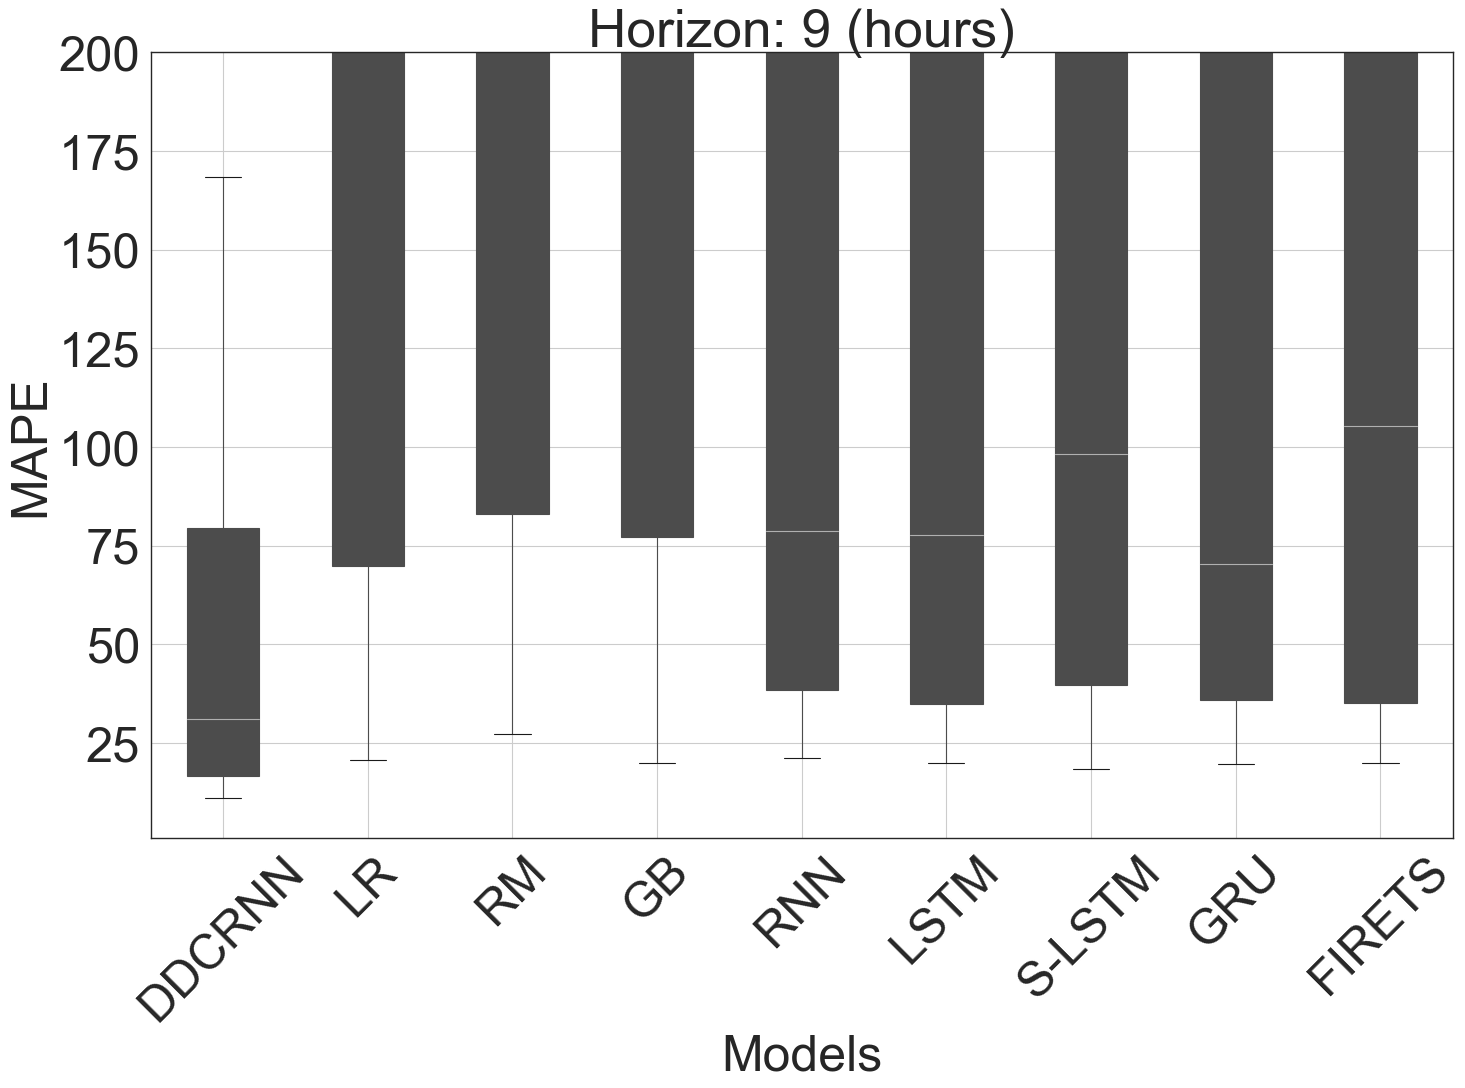

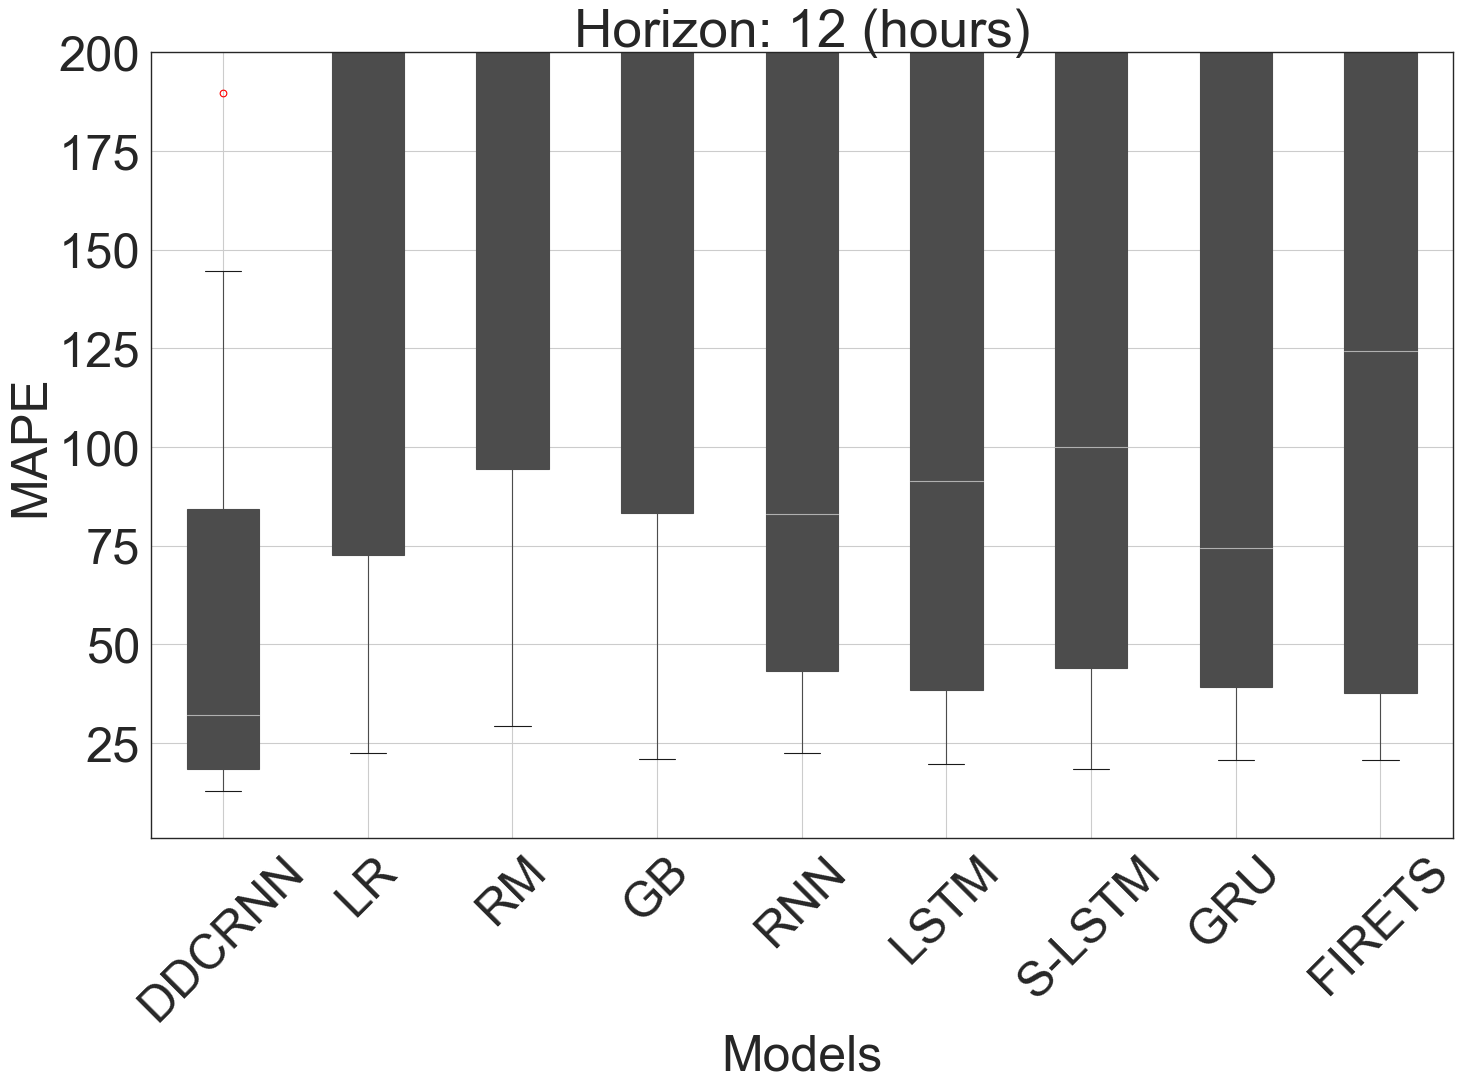

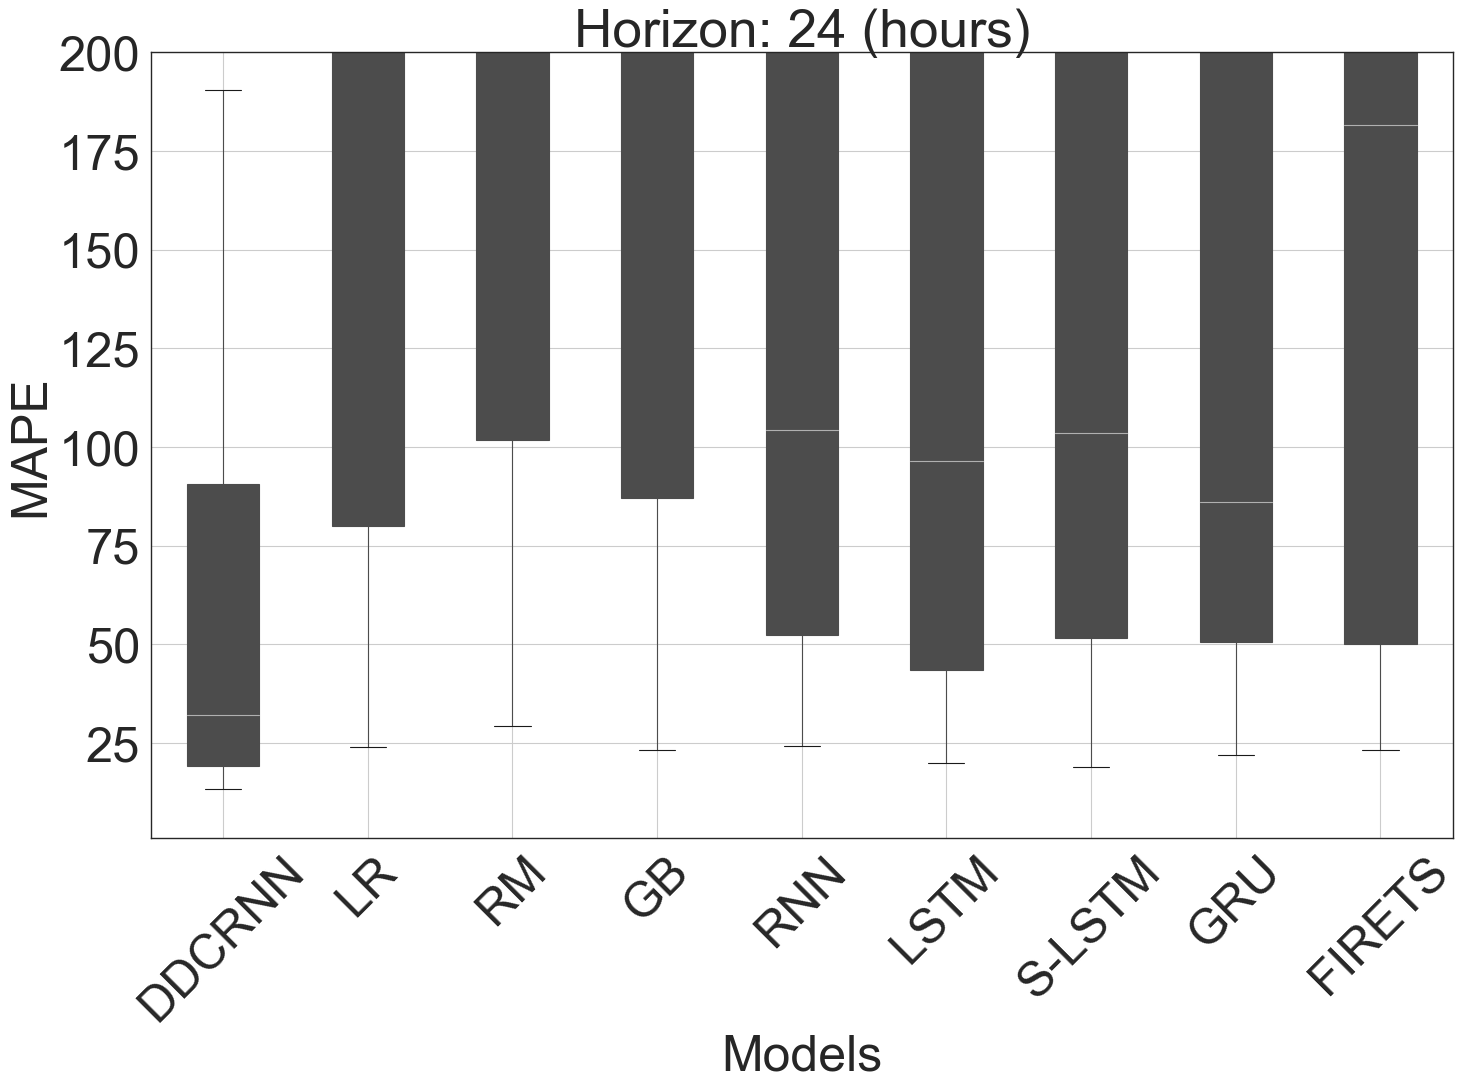

In [80]:
df_DDCRNN = pd.read_csv('Results/Results_DDCRNN_30_24_full/MAPE_DCRNN.csv')
df_ARIMA = pd.read_csv('Results/Results_ARIMA/MAPE_ARIMA.csv')
df_LR = pd.read_csv('Results/Results_LinearRegression/MAPE_LinearRegression.csv')
df_RM = pd.read_csv('Results/Results_RandomForest/MAPE_RandomForest.csv')
df_GB = pd.read_csv('Results/Results_GradientBoosting/MAPE_GradientBoosting.csv')
df_RNNNR = pd.read_csv('Results/Results_SimpleRNN_NR/MAPE_SimpleRNN.csv')
#df_RNNR = pd.read_csv('R2_all/r2_94/R2_SimpleRNN_R.csv')
df_LSTMNR = pd.read_csv('Results/Results_vanillaLSTM_NR/MAPE_vanillaLSTM.csv')
#df_LSTMR = pd.read_csv('R2_all/r2_94/R2_vanillaLSTM_R.csv')
df_SLSTMNR = pd.read_csv('Results/Results_stackedLSTM_NR/MAPE_stackedLSTM.csv')
#df_SLSTMR = pd.read_csv('R2_all/r2_94/R2_stackedLSTM_R.csv')
df_GRUNR = pd.read_csv('Results/Results_GRU_NR/MAPE_GRU.csv')
#df_GRUR = pd.read_csv('R2_all/r2_94/R2_GRU_R.csv')
df_FIRETS = pd.read_csv('Results/fireTS/MAPE_fireTS.csv')

for horizon in [3, 6, 9, 12, 24]:
    df_hor = pd.DataFrame()
    
    df_hor['DDCRNN'] = df_DDCRNN.iloc[:, horizon]
    df_hor['ARIMA'] = df_ARIMA.iloc[:, horizon]
    df_hor['LR'] = df_LR.iloc[:, horizon]
    df_hor['RM'] = df_RM.iloc[:, horizon]
    df_hor['GB'] = df_GB.iloc[:, horizon]
    df_hor['RNN'] = df_RNNNR.iloc[:, horizon]
    #df_hor['RNNR'] = df_RNNR.iloc[:, horizon]
    df_hor['LSTM'] = df_LSTMNR.iloc[:, horizon]
    #df_hor['LSTMR'] = df_LSTMR.iloc[:, horizon]
    df_hor['S-LSTM'] = df_SLSTMNR.iloc[:, horizon]
    #df_hor['SLSTMR'] = df_SLSTMR.iloc[:, horizon]
    df_hor['GRU'] = df_GRUNR.iloc[:, horizon]
    #df_hor['GRUR'] = df_GRUR.iloc[:, horizon]
    df_hor['FIRETS'] = df_FIRETS.iloc[:, horizon]
    
    plt.figure(figsize=(21, 13), dpi= 80, facecolor='w', edgecolor='k')
    c = 'red'
    bp2 = df_hor.boxplot(notch=False, patch_artist=True,
            boxprops=dict(facecolor='blue', color='blue'),
            capprops=dict(color='blue'),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))
        
    plt.ylim(1, 200)
    plt.xticks(rotation=45)
    plt.ylabel('MAPE', fontsize=45)     
    plt.xlabel('Models', fontsize=45) 
    plt.title('Horizon: %d (hours)'%(horizon) )